In [3]:
import numpy as np
import pandas as pd
import preprocessing
import shared_constants
from data_reading.phyphox import get_experiments, read_experiment
from features import compute_and_visualize_motifs, motif_count_mean
%matplotlib inline


# down sampling rate: we use every nth sample
listening_rate = 10

experiments = get_experiments()
data_frame = read_experiment(experiments[0])
data_frame = preprocessing.align_data(data_frame, listening_rate=listening_rate, reference_sensor=None)

# calculate auto-correlation coefficients for acceleration
_regex = "{sensor_name}_{dimension}".format(sensor_name="acceleration",
                                            dimension=shared_constants.DIMENSIONS_KEY_LIST)
acceleration_data_frame = data_frame.filter(regex=_regex, axis=1)
# calculate auto-correlation coefficients for gyroscope
_regex = "{sensor_name}_{dimension}".format(sensor_name="gyroscope", dimension=shared_constants.DIMENSIONS_KEY_LIST)
gyroscope_data_frame = data_frame.filter(regex=_regex, axis=1)

/Users/julio/Documents/Uni/5_Master/Master Project/mp-mental-health-2020/src/preprocessing/_data_frame.py:31: FutureWarning: Passing datetime64-dtype data to TimedeltaIndex is deprecated, will raise a TypeError in a future version
  time_delta_index = pd.TimedeltaIndex(timestamp_to_date, unit=output_timestamp_unit)


In [4]:
# analyze the matrix profile for actions that take between 3 and 10 seconds
windows = list(range(300,1000,100))
data_frame

,acceleration_x,acceleration_y,acceleration_z,gyroscope_x,gyroscope_y,gyroscope_z
00:00:00.019897,-0.111406,-0.007795,-0.055800,-0.074131,0.114174,0.033573
00:00:00.029897,-0.094534,-0.001496,0.001651,-0.051417,0.088783,0.003113
00:00:00.039897,0.017864,0.008524,0.072816,-0.042856,0.054607,-0.007414
00:00:00.049897,0.219101,0.022453,0.152936,-0.047786,0.012376,0.001423
00:00:00.059897,0.278157,0.054707,0.010240,-0.049217,-0.010753,0.024552
...,...,...,...,...,...,...
00:05:25.829897,-0.292311,-0.095448,-0.071085,0.068089,0.154852,-0.002777
00:05:25.839897,-0.315940,-0.066380,-0.122576,0.125404,0.048034,-0.007172
00:05:25.849897,-0.234664,0.001895,-0.508693,0.155209,-0.058786,-0.007176
00:05:25.859897,0.203716,0.102353,-0.283001,0.163361,-0.140128,0.012407


## Create matrix profiles for each accelerometer and gyro dimension

Look at time windows of 3 to 10 seconds

### Acceleration x

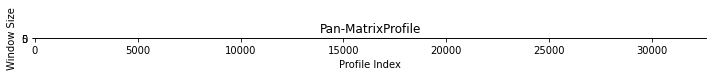

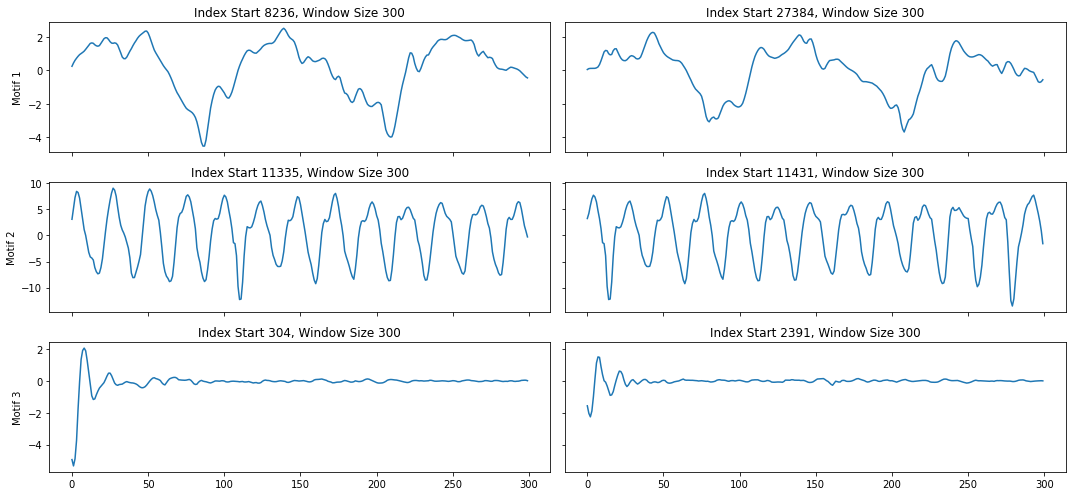

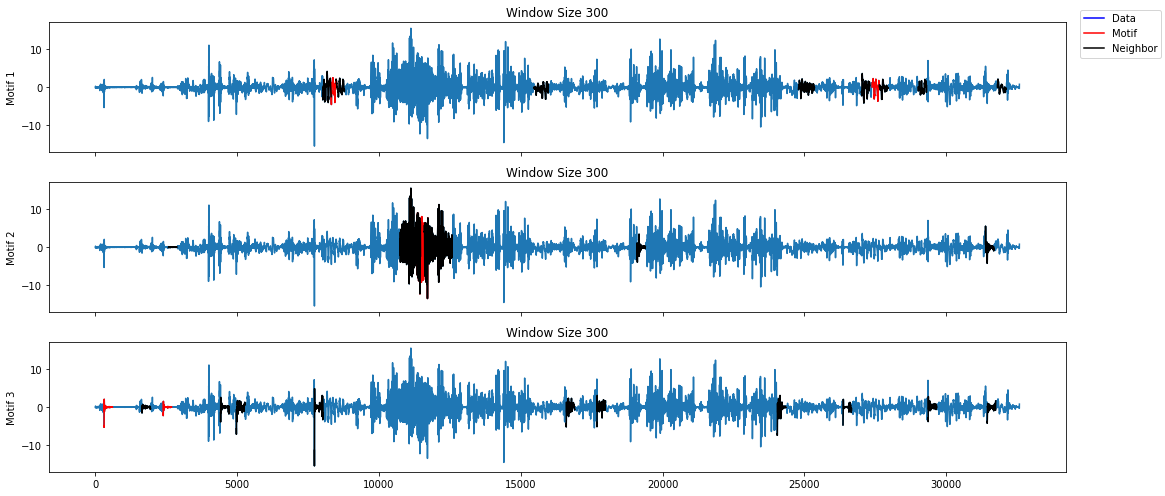

In [5]:
# run analyze on all cpu cores
_ = compute_and_visualize_motifs(acceleration_data_frame['acceleration_x'].to_numpy(), windows=windows)

### Acceleration y

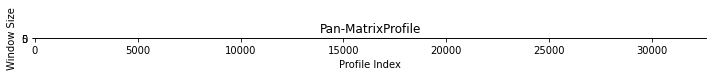

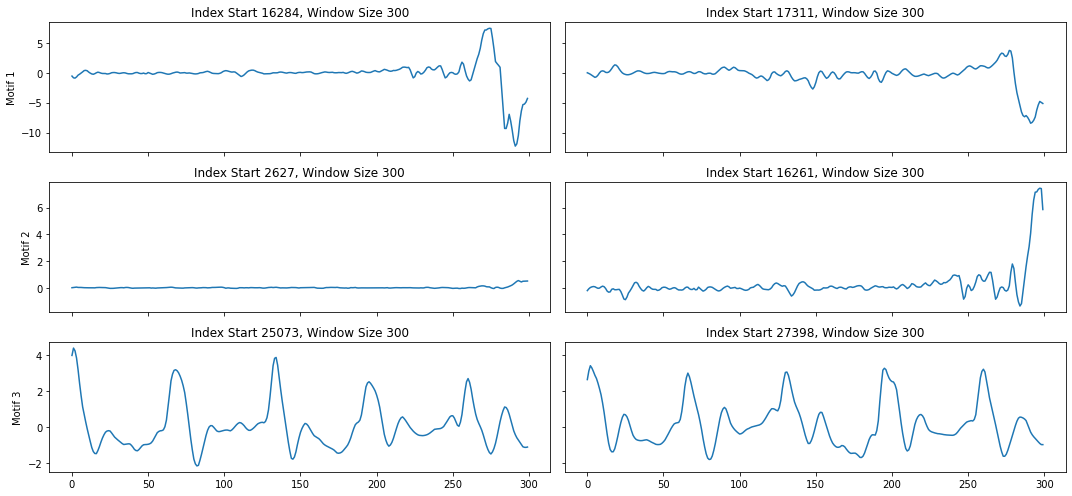

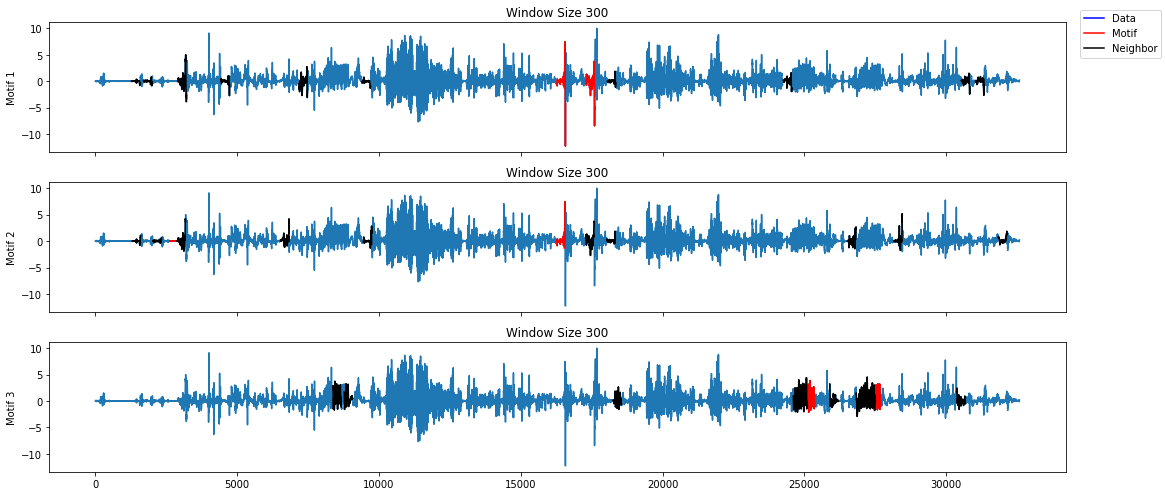

In [6]:
_ = compute_and_visualize_motifs(acceleration_data_frame['acceleration_y'].to_numpy(), windows=windows)

### Acceleration z

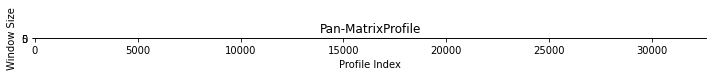

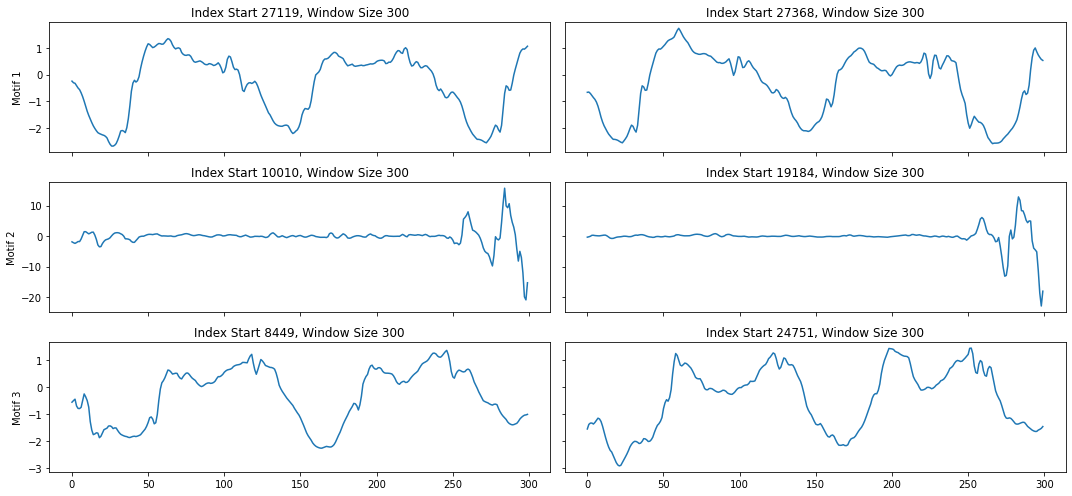

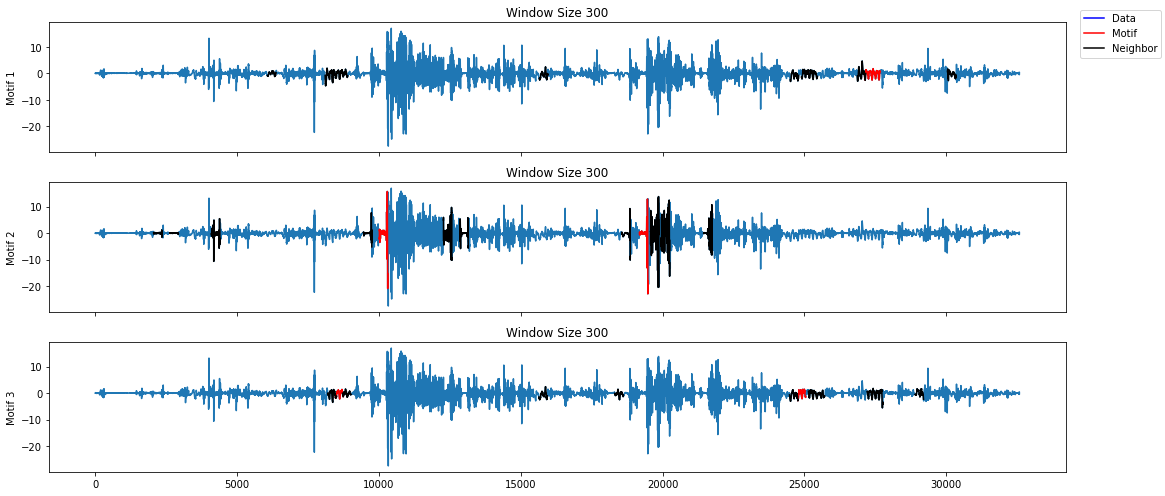

In [7]:
_ = compute_and_visualize_motifs(acceleration_data_frame['acceleration_z'].to_numpy(), windows=windows)

### Gyro x

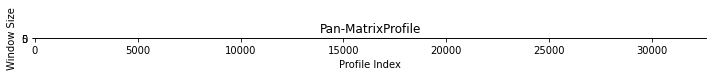

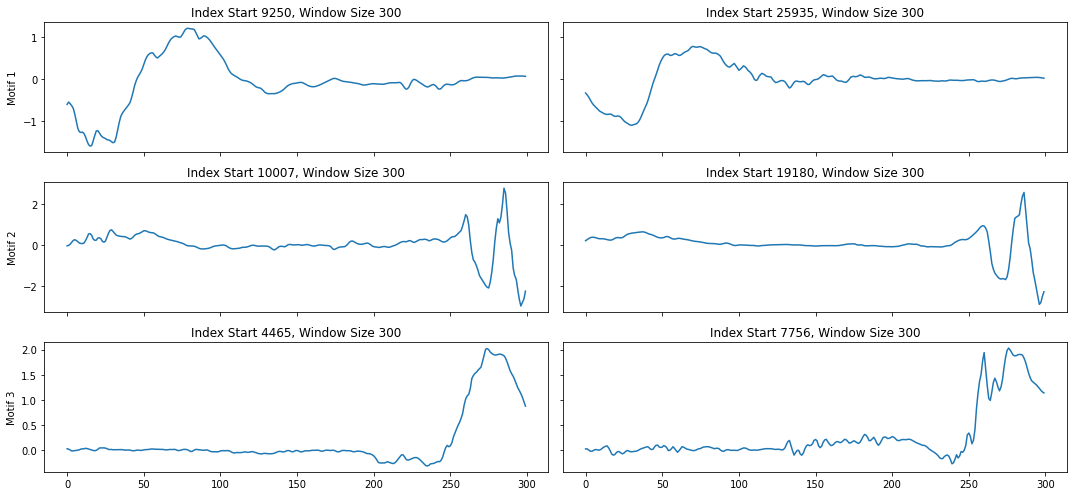

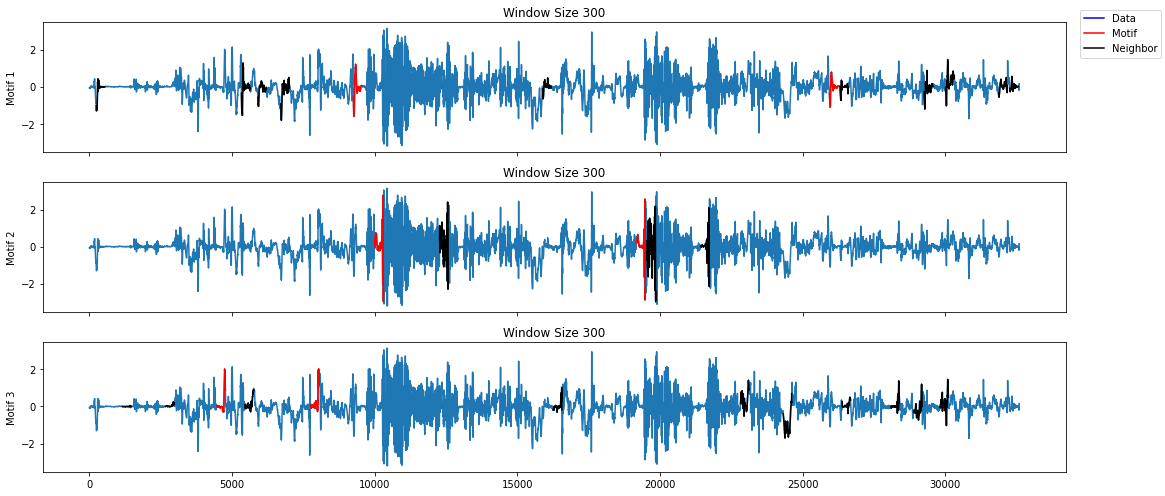

In [8]:
_ = compute_and_visualize_motifs(gyroscope_data_frame['gyroscope_x'].to_numpy(), windows=windows)

### Gyro y

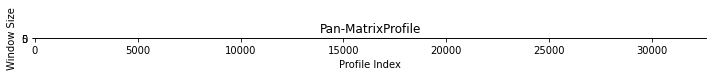

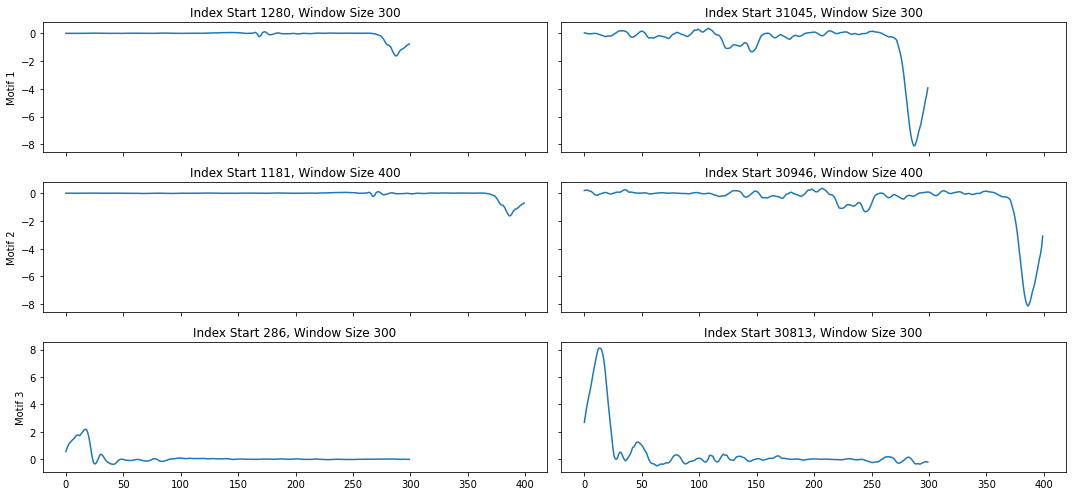

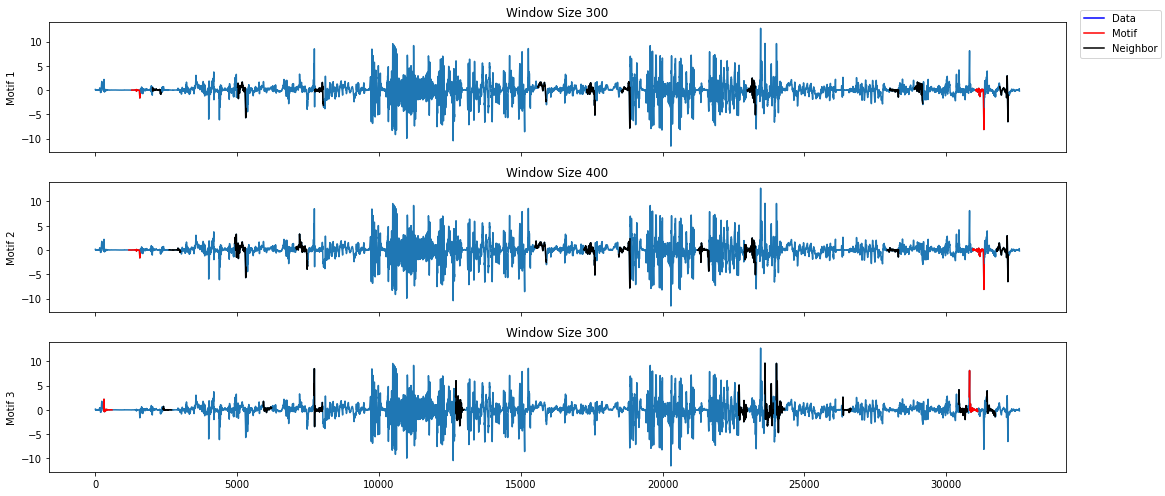

In [9]:
_ = compute_and_visualize_motifs(gyroscope_data_frame['gyroscope_y'].to_numpy(), windows=windows)

### Gyro z

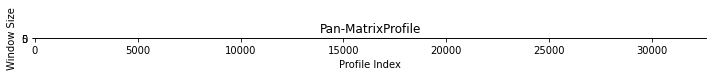

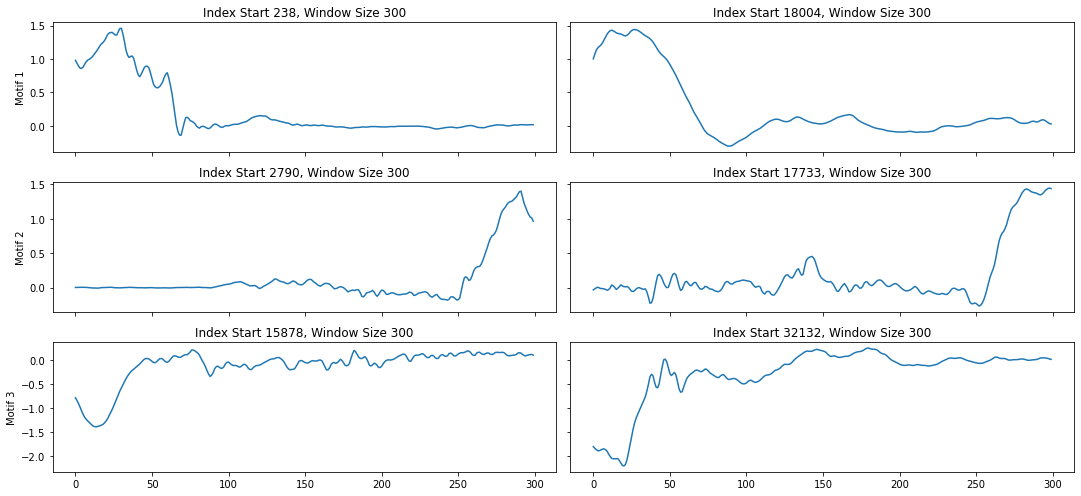

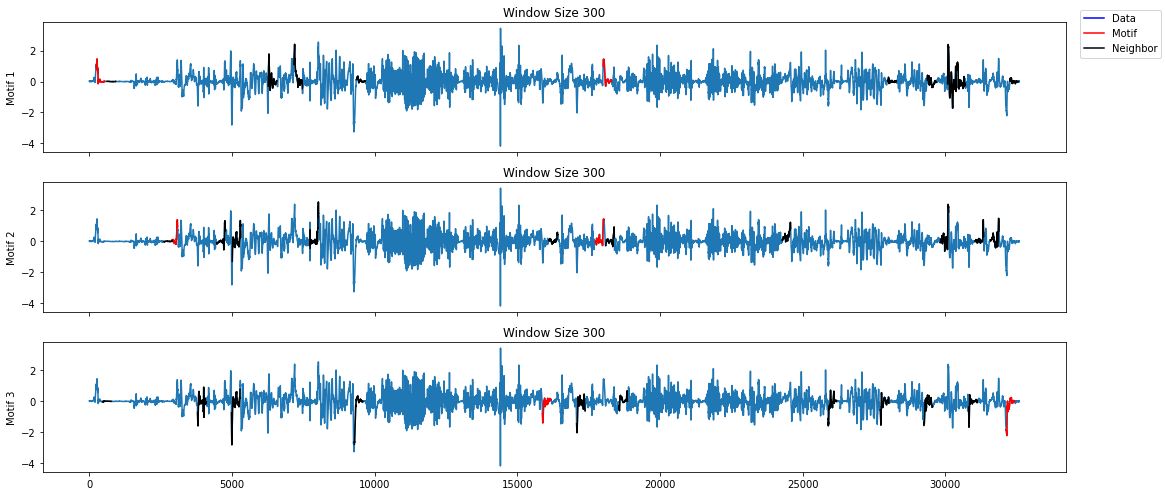

In [10]:
_ = compute_and_visualize_motifs(gyroscope_data_frame['gyroscope_z'].to_numpy(), windows=windows)

Now we've seen the plots for different univariate MPAs. To get a full recognition
on top of all data streams we need to reduce the dimensionality of the data. For now we use the mean of all acceleration streams.

### Accelerometer mean

12.0

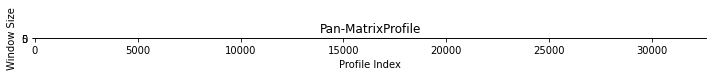

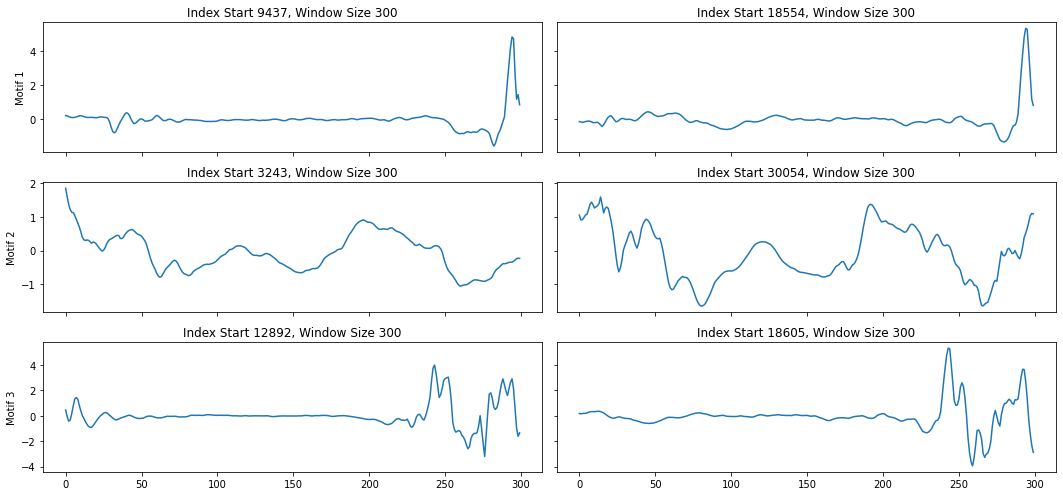

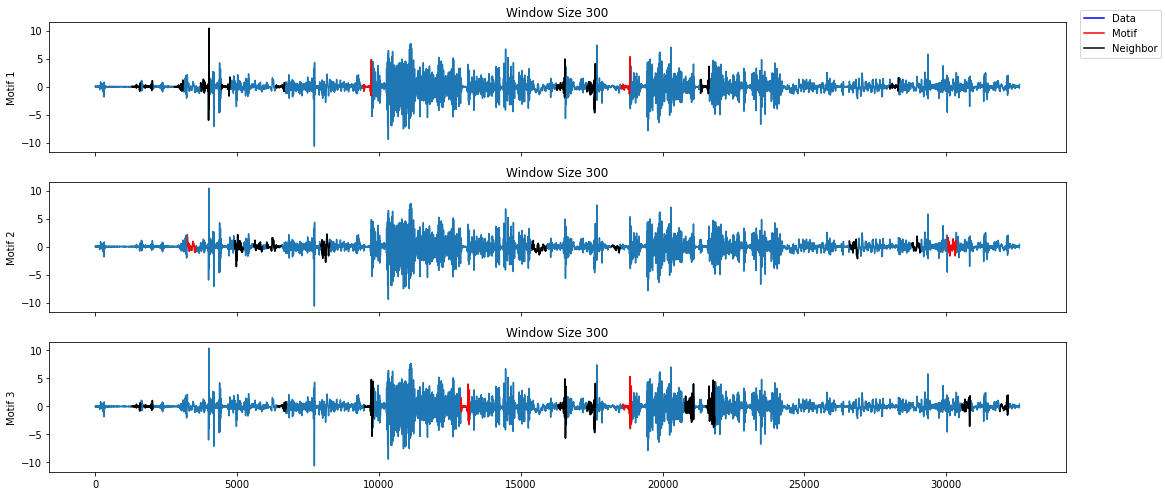

In [11]:
mean_coefficient_data_frame_acceleration = acceleration_data_frame.apply(np.mean, axis=1).to_frame()
profile_motifs = compute_and_visualize_motifs(mean_coefficient_data_frame_acceleration[0].to_numpy(), windows=windows)
motif_count_mean(profile_motifs)

### Gyro mean

11.333333333333334

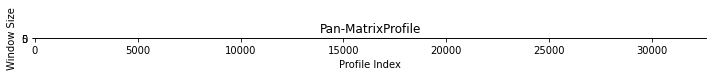

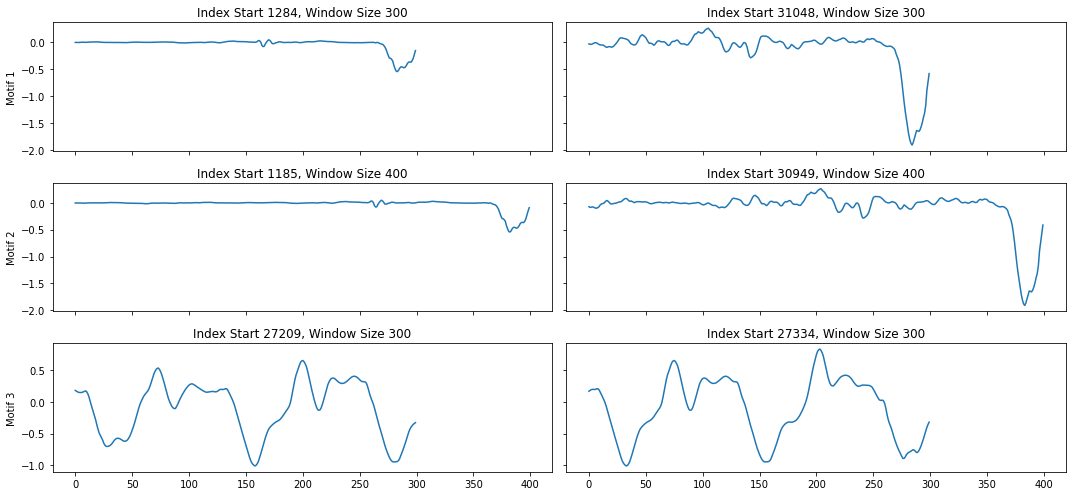

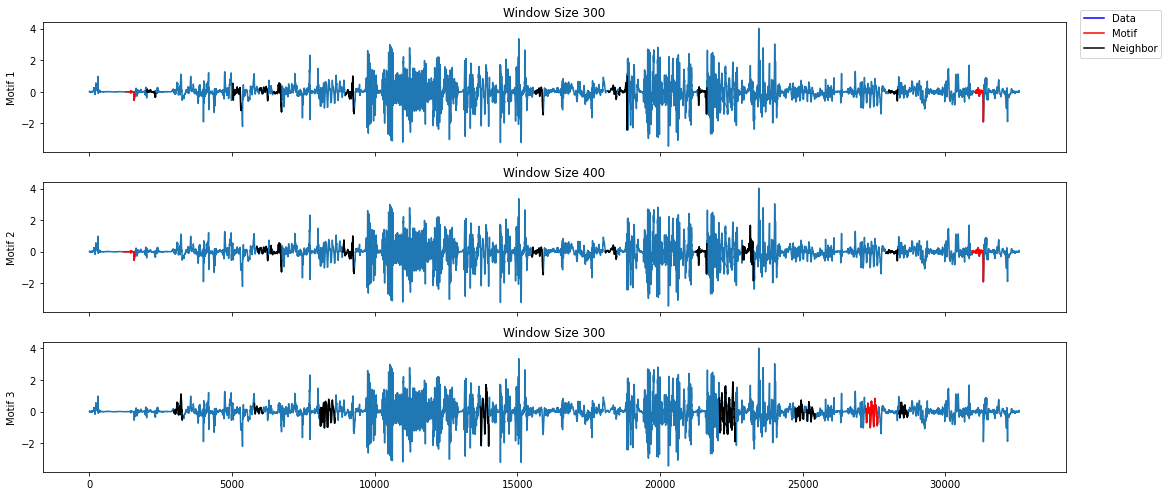

In [12]:
mean_coefficient_data_frame_gyro = gyroscope_data_frame.apply(np.mean, axis=1).to_frame()
profile_motifs = compute_and_visualize_motifs(mean_coefficient_data_frame_gyro[0].to_numpy(), windows=windows)
motif_count_mean(profile_motifs)

### Combined accelerometer and gyro mean

Repeated pattern occurs 12.0 times on average per motif


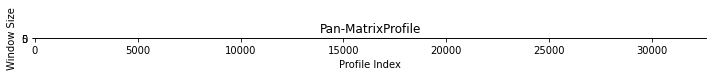

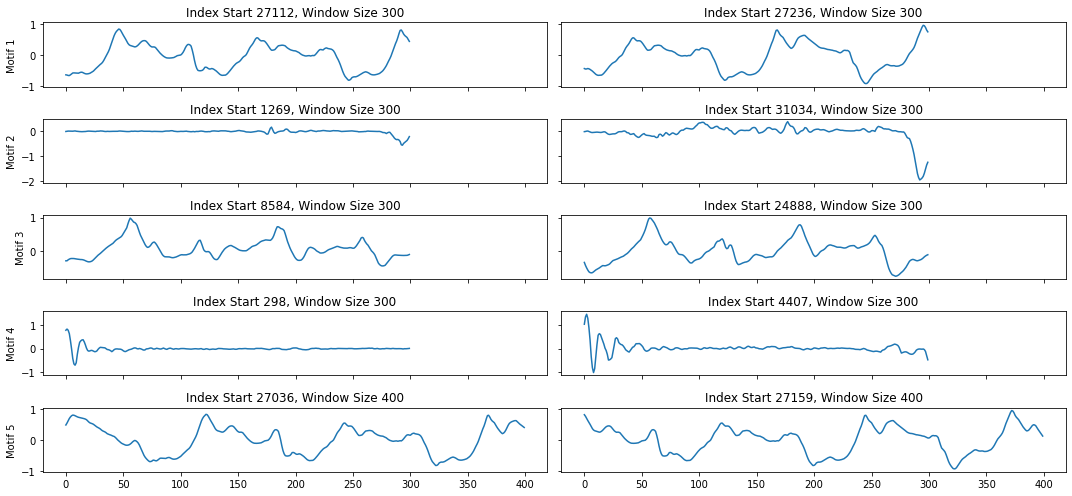

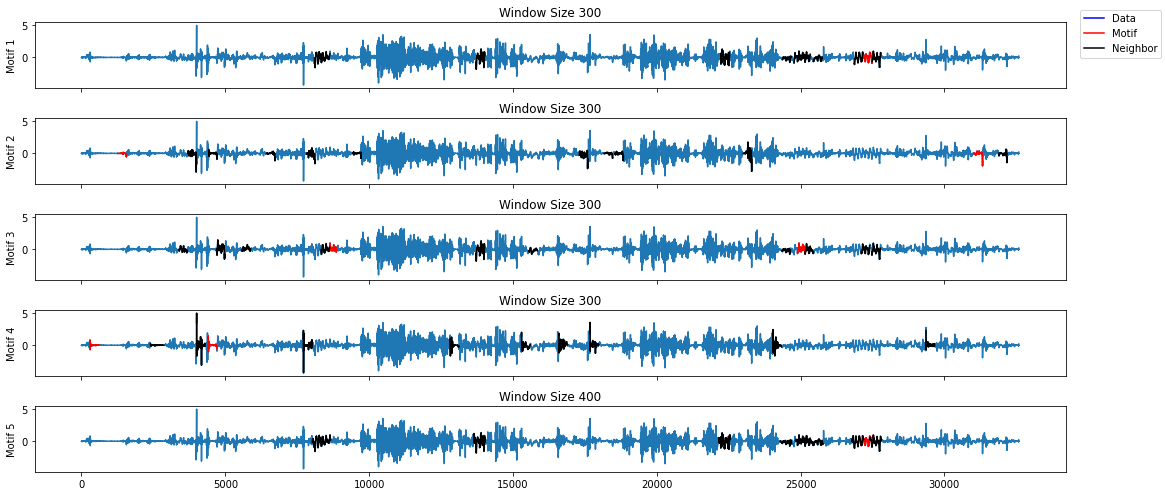

In [13]:
mean_coefficient_data_frame_all = pd.concat([gyroscope_data_frame,acceleration_data_frame], axis=1).apply(np.mean, axis=1).to_frame()
profile_motifs = compute_and_visualize_motifs(mean_coefficient_data_frame_all[0].to_numpy(), windows=windows, k=5)

print("Repeated pattern occurs {} times on average per motif".format(motif_count_mean(profile_motifs)))